# PMT calibration

In [68]:
from __future__ import print_function

### Revision

In [69]:
import time
print(time.strftime("%d/%m/%Y"),' ',time.strftime("%H:%M:%S"))

26/10/2016   23:45:24


### Dependencies

In [70]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import numpy as np
import tables
import pandas as pd
import time

In [72]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
matplotlib.style.use('ggplot')

In [73]:
pp = %env PYTHONPATH
print(pp)
#from Nh5 import *

/Users/hernando/Software/root/lib:/Users/hernando/Software/lib:/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/IC/Core:/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/IC/Config:/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/IC/Sierpe


### DB  

In [74]:
icdat = '/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/Data/NEWMC/'
ifdat = 'nexus_NEW_NEXT_v0_08_00_Kr_ACTIVE_5bar_1000kev_0.next_10000.root.h5'
h5in =tables.open_file(icdat+ifdat,'a')
# h5in

In [75]:
# DB position of the (ordered) SiPMs 
sipmdb = h5in.root.Sensors.DataSiPM
pmtdb = h5in.root.Sensors.DataPMT

print('DB for a SIPM index {}, {}'.format(0,pmtdb[0]))
positions = map(lambda i: pmtdb[i][2], range(12))
# positions

DB for a SIPM index 0, (0, 1, [-23.9414005279541, 65.77850341796875, -10000.0], 0.001641481856365, -22.916799545288086)


### SiPM calibration data

In [76]:
indir='/Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/Data/NEW/pmtcalib/'
irun='1994'
infile='pmtCal_corrLED_R'+irun

In [77]:
# input calibration data: dark current and led
import sipmcalib as sc
called = sc.CalData(indir+infile+'spe.txt',nsensors=12)
#caldark = sc.CalData(indir+infile+'_dark.txt')

loaded calibration data from file /Users/hernando/Investigacion/NEXT/NEXT-Reco/icnew/Data/NEW/pmtcalib/pmtCal_corrLED_R1994spe.txt
number of SiPMs with data 12


In [78]:
# create pdf file to put the figures
from matplotlib.backends.backend_pdf import PdfPages
pdf = None

In [79]:
# take the reference values
xbins = called.xbins
indexes = called.indexes

## Calibration

In [80]:
#chi2,pss = sc.cal_fit_ngauss(called,indexes,ngauss=3)
chi2,pss = sc.cal_fit_poissongauss(called,indexes,ngauss=4)
zpss = zip(indexes,pss)

fitting data...


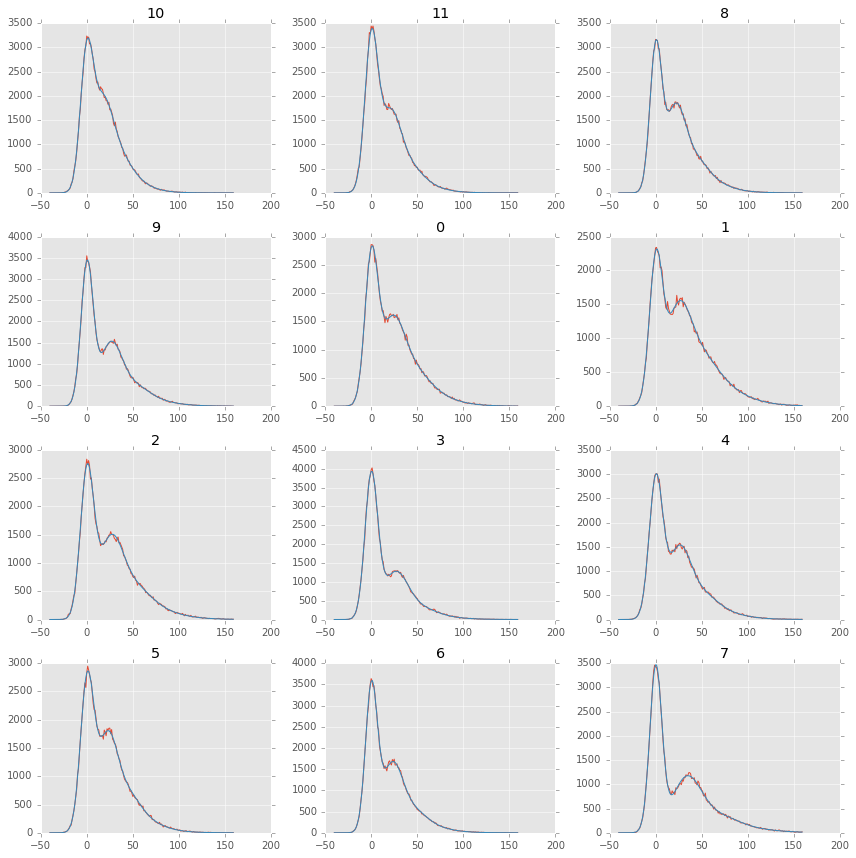

In [81]:
pdf = None
pdf = PdfPages('calf_R'+irun+'_pg_fits.pdf')
fun = sc.ffun_poissongauss
fig = sc.polo_cal_fit(called,indexes,pss,fun,xrange=(-40.,160.))
if (pdf): pdf.savefig(fig)
pdf.close()

In [82]:
pan = sc.cal_fit_poissongauss_panda(indexes, chi2, pss)

In [83]:
pan

,chi2,gain,indexes,noise,noise-pe,ntot,pedestal,pes
0,0.822605,16.391751,10,6.949828,8.633431,119826.877625,-0.254990,0.991432
1,0.989178,20.111422,11,7.161347,8.796769,119817.144309,0.162309,0.785863
2,0.850220,20.949779,8,6.479205,8.546011,119849.702141,0.225349,0.936014
3,0.795109,25.382313,9,6.642083,10.286794,119858.373920,0.291316,0.787361
4,0.953000,22.045144,0,7.116121,11.077045,119841.046148,0.189750,1.004291
5,0.912579,23.604150,1,7.089255,11.779624,119826.646151,0.268295,1.221498
6,0.963579,25.396670,2,7.345076,11.145764,119802.979098,0.289176,0.948506
7,1.009901,25.884495,3,6.951151,11.560436,119869.119957,0.172639,0.610418
8,0.912917,24.959107,4,7.369183,10.182738,119785.419412,0.273056,0.840484
9,0.951828,21.869454,5,7.334059,8.078831,119818.431939,0.399016,0.910693


In [84]:
pan.to_hdf('calf_R'+irun+'_pg_panda.h5','df',mode='w',format='table',data_columns=True)

### Plotting parameters

That's all folks!